In [ ]:
import pandas as pd

# Đọc tập dữ liệu từ file CSV
df = pd.read_csv("udemy_courses.csv")

In [ ]:
# sử dụng phương thức str.contains() trên cột 'course_title' của DataFrame.
# Mẫu regex [^\x00-\x7F] được sử dụng để xác định các dòng có ký tự không thuộc bảng mã ASCII trong "course title"

# Tạo một mask để xác định các dòng có "course title" bị lỗi chữ
mask = df['course_title'].str.contains(r'[^\x00-\x7F]', na=False)

# Lọc các dòng có "course title" bị lỗi chữ
rows_with_errors = df[mask]

# In các dòng có "course title" bị lỗi chữ
for index, row in rows_with_errors.iterrows():
    print(row['course_title'])

# Xóa các dòng có "course title" bị lỗi chữ
df_cleaned = df.drop(rows_with_errors.index)

In [ ]:
# Xóa cột "URL"
df_cleaned = df.drop('url', axis=1)

In [ ]:
# Lọc các khóa học có "lecture" và "duration" bằng 0 và xóa chúng

df_cleaned = df_cleaned[(df_cleaned['num_lectures'] != 0) & (df_cleaned['content_duration'] != 0)]


In [ ]:
# Tách cột "published_timestamp" thành ngày tháng năm

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

df_cleaned['year'] = df['published_timestamp'].dt.year
df_cleaned['month'] = df['published_timestamp'].dt.month
df_cleaned['day'] = df['published_timestamp'].dt.day




<ipython-input-4-304c089906e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df['published_timestamp'].dt.year
<ipython-input-4-304c089906e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df['published_timestamp'].dt.month
<ipython-input-4-304c089906e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
# Xuất tập dữ liệu đã được làm sạch thành file CSV
df_cleaned.to_csv("udemy_courses_cleaned.csv", index=False)

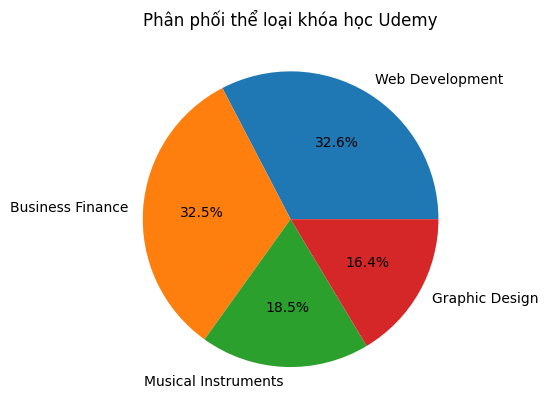

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('/content/udemy_courses_cleaned.csv')

# Tính toán tỷ lệ phần trăm của từng thể loại khóa học
category_counts = data['subject'].value_counts()
labels = category_counts.index
sizes = category_counts.values

# Vẽ biểu đồ tròn
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Thêm tiêu đề
plt.title('Phân phối thể loại khóa học Udemy')

# Hiển thị biểu đồ
plt.show()
